## Living Goods

#### Global Senior Manager -Data Science & Analytics --Assignment

#### Candidate Name: Wycliffe Mwebi

##### Tools Used: R and Jupyter Notebook

In [539]:
#Get all the necessary R Libraries
library(tidyverse) #Assists with data import, tidying, manipulation, and data visualization.
library(jsonlite) # JSON parsing
library(dplyr)  # data wrangling
library(tidyjson)
library(tibble)# nicer dataframes
library(tidyr)  # creating tidy data
library(purrr)  # apply functions to lists
library(rjson)
library(jsonify)  # Helps to Convert Between 'R' Objects and JSON
library(listviewer)
library (ggplot2) # for plotting graphs or charts
library(reshape2) # for charts
library(gridExtra)
library(plotly)

**Load Assessment Data**

In [620]:
# load data
data <- readRDS(r'{C:\Users\user\Documents\LG\LG2\Assessments.rds}') 

# convert to dataframe
data_df <- as.data.frame(data)  

# view the resulting data frame (Top 3 records only)
head(data_df, 1)

,doc,vht_id,reported,formname
,<chr>,<chr>,<dttm>,<chr>
1,"{""_id"": ""95011b19-86ed-4cfd-b1a5-2ac1102da893"", ""_rev"": ""1-5281ab368e73419da13a6ddd0ebeeb30"", ""form"": ""assessment_follow_up"", ""from"": ""+256770667221"", ""type"": ""data_record"", ""fields"": {""meta"": {""instanceID"": ""uuid:ef5fa837-f68e-4bb9-9711-76cccfa22896""}, ""inputs"": {""meta"": {""location"": {""lat"": """", ""long"": """", ""error"": """", ""message"": """"}, ""deprecatedID"": """"}, ""source"": ""task"", ""contact"": {""_id"": ""7afecba4-b4f7-419f-9c67-6bb4ad6fed8c"", ""name"": ""Makirin"", ""phone"": """", ""parent"": {""contact"": {""phone"": ""+256779067478""}}, ""date_of_birth"": ""2020-06-21""}, ""source_id"": ""0ae4e91f-43a6-4829-8cce-c9130a43e550"", ""t_follow_up_type"": ""treat"", ""t_follow_up_count"": ""1""}, ""ppe_risk"": ""false"", ""covid_risk"": ""false"", ""patient_id"": ""7afecba4-b4f7-419f-9c67-6bb4ad6fed8c"", ""danger_signs"": """", ""patient_name"": ""Makirin"", ""form_source_id"": ""0ae4e91f-43a6-4829-8cce-c9130a43e550"", ""group_improved"": {""g_patient_improved"": ""yes"", ""patient_improved_yes"": """"}, ""patient_better"": """", ""follow_up_count"": ""1"", ""patient_improved"": ""yes"", ""group_danger_signs"": {""g_danger_signs"": """", ""danger_signs_note"": """"}, ""patient_age_in_days"": ""798"", ""patient_age_in_years"": ""2"", ""group_recommendations"": {""r_feeding"": """", ""r_feeding_note4"": """"}, ""patient_age_in_months"": ""26"", ""patient_contact_phone"": ""+256779067478"", ""group_followup_options"": {""follow_up_type"": ""treat"", ""covid_have_mask"": ""yes"", ""covid_screening"": ""other"", ""covid_have_apron"": ""yes"", ""covid_wash_hands"": ""yes"", ""follow_up_method"": ""in_person"", ""covid_have_gloves"": ""yes"", ""covid_have_goggles"": ""yes"", ""covid_keep_2m_distance"": """"}, ""referral_follow_up_needed"": ""false"", ""patient_health_facility_visit"": """"}, ""contact"": {""_id"": ""eb3ccfcf-dc80-4aa2-87e6-95cccba8b372"", ""parent"": {""_id"": ""c54d2e2f-63a0-428a-a551-861116a00549"", ""parent"": {""_id"": ""49261180256f72a3e494caf06dc81465""}}}, ""_attachments"": {""content"": {""stub"": true, ""digest"": ""md5-YEoRcbMu60GJ/Q3lpRlwfQ=="", ""length"": 3043, ""revpos"": 1, ""content_type"": ""application/xml""}}, ""content_type"": ""xml"", ""hidden_fields"": [""meta""], ""reported_date"": 1661684881706}",eb3ccfcf-dc80-4aa2-87e6-95cccba8b372,2022-08-28 11:08:01,assessment_follow_up


*As we can see the Assessment dataset has 4 columns namely 'doc',	'vht_id',	'reported',	'formname' BUT the 'doc' column is heavily nested and should be collapsed/unnested to provide our dataset with more columns.*

***Extract information from the doc column***

In [495]:
# Define a function to extract information from the doc column
extract_info <- function(row) {
  # Convert the JSON string to a list
  doc_list <- jsonlite::fromJSON(row[["doc"]])
  
  # Extract the relevant information
  vht_id <- row[["vht_id"]]
  reported <- row[["reported"]]
  formname <- row[["formname"]]   
  phone_number <- doc_list[["from"]]
  patient_name <- doc_list[["fields"]][["inputs"]][["contact"]][["name"]]
  sex         <- doc_list[["fields"]][["inputs"]][["contact"]][["sex"]]
  patient_age <- doc_list[["fields"]][["inputs"]][["contact"]][["date_of_birth"]]
  symptom_cough <- doc_list[["fields"]][["symptom_cough"]]
  symptom_fever <- doc_list[["fields"]][["symptom_fever"]]
  diagnosis_cough <- doc_list[["fields"]][["group_diagnosis"]][["diagnosis_cough"]]
  diagnosis_diarrhea <- doc_list[["fields"]][["group_diagnosis"]][["diagnosis_diarrhea"]]
  referral_follow_up <- doc_list[["fields"]][["referral_follow_up"]]
  treatment_follow_up  <- doc_list[["fields"]][["treatment_follow_up"]]
  ppe_risk        <- doc_list[["fields"]][["ppe_risk"]]
  bcg_vaccine   <- doc_list[["fields"]][["bcg_vaccine"]]
  covid_risk   <- doc_list[["fields"]][["covid_risk"]]
  covid_have_mask    <- doc_list[["fields"]][["group_covid"]][["covid_have_mask"]]
  covid_screening    <- doc_list[["fields"]][["group_covid"]][["covid_screening"]]
  covid_wash_hands   <- doc_list[["fields"]][["group_covid"]][["covid_wash_hands"]]
  follow_up_method    <- doc_list[["fields"]][["group_covid"]][["follow_up_method"]]
  covid_have_gloves    <- doc_list[["fields"]][["group_covid"]][["covid_have_gloves"]]
  covid_have_goggles    <- doc_list[["fields"]][["group_covid"]][["covid_have_goggles"]]
  covid_have_an_apron    <- doc_list[["fields"]][["group_covid"]][["covid_have_an_apron"]]
  covid_keep_2m_distance <- doc_list[["fields"]][["group_covid"]][["covid_keep_2m_distance"]]
  covid_have_kevon_or_surgical_spirt <- doc_list[["fields"]][["group_covid"]][["covid_have_kevon_or_surgical_spirt"]]
  
   # Create a list with the extracted information, using NA to indicate missing values
  info_list <- list(
    vht_id = ifelse(length(vht_id) > 0, vht_id, NA),
    reported = ifelse(length(reported) > 0, reported, NA),
    formname = ifelse(length(formname) > 0, formname, NA),
    phone_number = ifelse(length(phone_number) > 0, phone_number, NA),
    patient_name = ifelse(length(patient_name) > 0, patient_name, NA),
    sex  = ifelse(length(sex) > 0, sex, NA),
    patient_age = ifelse(length(patient_age) > 0, patient_age, NA),
    symptom_cough = ifelse(length(symptom_cough) > 0, symptom_cough, NA),
    symptom_fever = ifelse(length(symptom_fever) > 0, symptom_fever, NA),
    diagnosis_cough = ifelse(length(diagnosis_cough) > 0, diagnosis_cough, NA),
    diagnosis_diarrhea = ifelse(length(diagnosis_diarrhea) > 0, diagnosis_diarrhea, NA),
    referral_follow_up = ifelse(length(referral_follow_up) > 0, referral_follow_up, NA),
    treatment_follow_up = ifelse(length(treatment_follow_up) > 0, treatment_follow_up, NA),
    ppe_risk    = ifelse(length(ppe_risk) > 0, ppe_risk, NA),
    bcg_vaccine = ifelse(length(bcg_vaccine) > 0, bcg_vaccine, NA),
    covid_risk  = ifelse(length(covid_risk) > 0, covid_risk, NA),
    covid_have_mask   = ifelse(length(covid_have_mask) > 0, covid_have_mask, NA),
    covid_screening   = ifelse(length(covid_screening) > 0, covid_screening, NA),
    covid_wash_hands  = ifelse(length(covid_wash_hands) > 0, covid_wash_hands, NA),
    follow_up_method = ifelse(length(follow_up_method) > 0, follow_up_method, NA),
    covid_have_gloves = ifelse(length(covid_have_gloves) > 0, covid_have_gloves, NA),
    covid_have_goggles = ifelse(length(covid_have_goggles) > 0, covid_have_goggles, NA),
    covid_have_an_apron = ifelse(length(covid_have_an_apron)> 0, covid_have_an_apron, NA),
    covid_keep_2m_distance = ifelse(length(covid_keep_2m_distance) > 0, covid_keep_2m_distance, NA),
    covid_have_kevon_or_surgical_spirt = ifelse(length(covid_have_kevon_or_surgical_spirt) > 0, covid_have_kevon_or_surgical_spirt, NA)
       
  )
  
  # Return the list
  return(info_list)
}

# Apply the extract_info function to each row in the dataframe
Assessments_list <- lapply(1:nrow(df), function(i) extract_info(df[i, ]))

# Convert the list to a data frame
Assessments_df <- as.data.frame(do.call(rbind, Assessments_list), stringsAsFactors = FALSE)
                      
# Print the resulting data frame
View(Assessments_df)

vht_id,reported,formname,phone_number,patient_name,sex,patient_age,symptom_cough,symptom_fever,diagnosis_cough,⋯,covid_risk,covid_have_mask,covid_screening,covid_wash_hands,follow_up_method,covid_have_gloves,covid_have_goggles,covid_have_an_apron,covid_keep_2m_distance,covid_have_kevon_or_surgical_spirt
<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
eb3ccfcf-dc80-4aa2-87e6-95cccba8b372,1661674082,assessment_follow_up,+256770667221,Makirin,NA,2020-06-21,NA,NA,NA,⋯,false,NA,NA,NA,NA,NA,NA,NA,NA,NA
868811bd-844b-49e5-ace7-55236fd68b60,1661515368,assessment,+256783276763,Emongin Elijah,male,2021-09-25,,false,,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
8b765554-1cef-4319-9b7c-65f4acf28f83,1669961521,assessment,+256787940506,Natsoma Suzan,female,2019-11-27,,true,,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
92744199-d5da-41b5-9bda-fbcdcfca6194,1643613994,assessment,+256785344588,Namagoye. Davis,male,2018-01-07,Cough for 3 days,false,pneumonia1,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
059455b0-7187-4318-b88c-d076e1d7bdab,1665241608,assessment,+256784147618,Baby Rebecca,female,2019-06-03,Cough for 3 days,true,pneumonia2b,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
8b765554-1cef-4319-9b7c-65f4acf28f83,1645714003,assessment_follow_up,+256787940506,Paul,NA,2021-02-22,NA,NA,NA,⋯,false,NA,NA,NA,NA,NA,NA,NA,NA,NA
937606177d7039c9fcebcbbfc404b913,1661929244,assessment_follow_up,+256772849819,Namono. Praise,NA,2018-10-14,NA,NA,NA,⋯,false,NA,NA,NA,NA,NA,NA,NA,NA,NA
70aa46c2-8d01-4c0c-94e3-220ca32c1f5b,1670481714,assessment,+256773652592,Mukesa Daneile,male,2021-11-02,,false,,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
937606177d7039c9fcebcbbfc402c270,1652581338,assessment,,Kakayi Joy,female,2019-10-11,Cough for 2 days,false,pneumonia1,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes


##### Explanation:
As you can see above, I have successfully Transformed the Assessments data into a tabular form. I did so by breaking down the 'doc' column into many columns and joining up the data with the rest of the Assesssment dataset.
The data frame shows 6000 rows and 25 columns. 

**NB: I know there are over 100 columns, BUT moving all those columns here will create a mess. Moreover, the standard practice is to try and avoid duplicating the transactional database into an analytics platform. It's prudent to just pick the columns you think you will need for analysis.**

I loaded the Assessment Rds file located at "C:/Users/user/Documents/LG/LG2/Assessments.rds" and defined a function 
named "extract_info" that extracts relevant information from the 'doc' column of the data. The extract_info function 
takes a single row of data and returns a list of extracted information.

The jsonlite::fromJSON function is used to convert the 'doc' column, which contains JSON strings, to a list. 
The extracted information includes the phone_number, patient_name, patient_age, symptom_cough, symptom_fever, 
diagnosis_cough, diagnosis_diarrhea, and referral_follow_up fields. The ifelse function is used to check if each 
field exists and assigns the value to the extracted information list. If the field does not exist, the function 
assigns the value NA to the extracted information list.


**b)Join CHP_DB and Assessments data to form one data set.**


In [496]:
#Load the CHP_DB dataset
# load data
chp_data <- readRDS(r'{C:\Users\user\Documents\LG\LG2\CHP_DB.rds}') 

# convert to dataframe
chp_data_df <- as.data.frame(chp_data)  

# view the resulting data frame (Top 5 records only)
head(chp_data_df, 5)


,branch_name,supervisor_uuid,chw_uuid
,<chr>,<chr>,<chr>
1,Mityana,a98ab4a8-cb6a-4f3f-8f4e-0fd872206ee9,6153b49d-85d3-41b7-8457-0008bd523d1a
2,Mbale,6055aa05-a451-42b0-890f-6820b2647cd1,937606177d7039c9fcebcbbfc4042902
3,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,9d85d332-e9f6-4f1d-ba77-470638d2b984
4,Mbale,bff93b3a-395d-495f-b279-ba074ee487ec,8b765554-1cef-4319-9b7c-65f4acf28f83
5,Mbale,bff93b3a-395d-495f-b279-ba074ee487ec,f9f78544-fc5e-495c-9aff-8f9ba8ae27d5


To combine the two datasets, I will first load each RDS file into a data frame using the readRDS() function in R. And since I have already done that, and have two data frames, CHP_DB_df and Assessments_df, I will then use a join operation to combine the two data frames.

From the data dictionary, I already know that chw_uuid(chp_data) = vhtid(Assessments data). So this is the column that will unite the two dataframes.


Then the Other Question is what type of Join to deploy.

I will perform a left join, where all the records from the left data frame (chp_data_df) will be preserved, 
and matching records from the right data frame (Assessments_df) will be included. If there is no 
match in the right data frame, the columns from that data frame will be filled with NA values in the merged data frame.



In [497]:
combined_df <- merge(chp_data_df, Assessments_df, by.x="chw_uuid", by.y="vht_id", all.y=TRUE)


View(combined_df) # Created a new dataframe know as combined_df

chw_uuid,branch_name,supervisor_uuid,reported,formname,phone_number,patient_name,sex,patient_age,symptom_cough,⋯,covid_risk,covid_have_mask,covid_screening,covid_wash_hands,follow_up_method,covid_have_gloves,covid_have_goggles,covid_have_an_apron,covid_keep_2m_distance,covid_have_kevon_or_surgical_spirt
<chr>,<chr>,<chr>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
03c3882f-3f94-497e-afbf-e879ba4a9b35,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,1658404254,assessment,+256708558606,Namutebi shutran,female,2019-11-03,,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
03c3882f-3f94-497e-afbf-e879ba4a9b35,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,1657272016,assessment,+256708558606,Nabuma. D,female,2018-05-18,Cough for 3 days,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
03c3882f-3f94-497e-afbf-e879ba4a9b35,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,1657355495,assessment,+256708558606,Ssuna Paiton.,male,2021-12-02,Cough for 3 days,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
03c3882f-3f94-497e-afbf-e879ba4a9b35,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,1647860921,assessment,+256708558606,Favor,female,2020-01-11,,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
03c3882f-3f94-497e-afbf-e879ba4a9b35,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,1656411252,assessment_follow_up,+256708558606,Bukenya abudul,NA,2018-11-04,NA,⋯,false,NA,NA,NA,NA,NA,NA,NA,NA,NA
03c3882f-3f94-497e-afbf-e879ba4a9b35,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,1660459302,assessment,+256708558606,Kiyagga k.,male,2022-01-02,Cough for 2 days,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
03c3882f-3f94-497e-afbf-e879ba4a9b35,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,1656141471,assessment,+256708558606,Nabitaka,female,2018-12-20,Cough for 3 days,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
03c3882f-3f94-497e-afbf-e879ba4a9b35,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,1663059391,assessment,+256708558606,Ndawura John .,male,2019-12-12,Cough for 3 days,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes
03c3882f-3f94-497e-afbf-e879ba4a9b35,Mityana,5de2fd38-ccb9-4e12-a76b-586a4fc0e2e3,1656058568,assessment,+256708558606,Lubulwa shafiki.,male,2019-06-19,,⋯,false,yes,other,yes,in_person,yes,yes,yes,,yes


**c)Generate a new column “month” from the reported_date or reported**

The reported_date column appears to be a UNIX time stamp. So i will need to convert that into an actual date.

In [498]:
#check data type of 'reported' column
class(Assessments_df$reported)


[1] "list"

**Convert Unix timestamp to POSIXct**

In [499]:
# dataframe is named Assessments_df and the timestamp column is 'reported'
Assessments_df$reported <- as.POSIXct(sapply(Assessments_df$reported, "[[", 1), origin = "1970-01-01", tz = "UTC")

# Extracting date and month columns
Assessments_df$date <- as.Date(Assessments_df$reported)
Assessments_df$month <- format(Assessments_df$reported, "%m")


In [500]:
# View the modified dataframe
Assessments_df


vht_id,reported,formname,phone_number,patient_name,sex,patient_age,symptom_cough,symptom_fever,diagnosis_cough,⋯,covid_screening,covid_wash_hands,follow_up_method,covid_have_gloves,covid_have_goggles,covid_have_an_apron,covid_keep_2m_distance,covid_have_kevon_or_surgical_spirt,date,month
<list>,<dttm>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<date>,<chr>
eb3ccfcf-dc80-4aa2-87e6-95cccba8b372,2022-08-28 08:08:01,assessment_follow_up,+256770667221,Makirin,NA,2020-06-21,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2022-08-28,08
868811bd-844b-49e5-ace7-55236fd68b60,2022-08-26 12:02:47,assessment,+256783276763,Emongin Elijah,male,2021-09-25,,false,,⋯,other,yes,in_person,yes,yes,yes,,yes,2022-08-26,08
8b765554-1cef-4319-9b7c-65f4acf28f83,2022-12-02 06:12:00,assessment,+256787940506,Natsoma Suzan,female,2019-11-27,,true,,⋯,other,yes,in_person,yes,yes,yes,,yes,2022-12-02,12
92744199-d5da-41b5-9bda-fbcdcfca6194,2022-01-31 07:26:33,assessment,+256785344588,Namagoye. Davis,male,2018-01-07,Cough for 3 days,false,pneumonia1,⋯,other,yes,in_person,yes,yes,yes,,yes,2022-01-31,01
059455b0-7187-4318-b88c-d076e1d7bdab,2022-10-08 15:06:48,assessment,+256784147618,Baby Rebecca,female,2019-06-03,Cough for 3 days,true,pneumonia2b,⋯,other,yes,in_person,yes,yes,yes,,yes,2022-10-08,10
8b765554-1cef-4319-9b7c-65f4acf28f83,2022-02-24 14:46:43,assessment_follow_up,+256787940506,Paul,NA,2021-02-22,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2022-02-24,02
937606177d7039c9fcebcbbfc404b913,2022-08-31 07:00:43,assessment_follow_up,+256772849819,Namono. Praise,NA,2018-10-14,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2022-08-31,08
70aa46c2-8d01-4c0c-94e3-220ca32c1f5b,2022-12-08 06:41:53,assessment,+256773652592,Mukesa Daneile,male,2021-11-02,,false,,⋯,other,yes,in_person,yes,yes,yes,,yes,2022-12-08,12
937606177d7039c9fcebcbbfc402c270,2022-05-15 02:22:18,assessment,,Kakayi Joy,female,2019-10-11,Cough for 2 days,false,pneumonia1,⋯,other,yes,in_person,yes,yes,yes,,yes,2022-05-15,05


In [501]:
# Reorder the columns
Assessments_df <- Assessments_df[, c("vht_id", "reported", "formname", "month", colnames(Assessments_df)[-c(1:4)])]

# Remove the previous columns
# Remove a column by name
Assessments_df <- Assessments_df[, !(names(Assessments_df) %in% c("month.3", "month.2", "month.1", "date.1" ))]


# View the modified dataframe
Assessments_df

vht_id,reported,formname,month,patient_name,sex,patient_age,symptom_cough,symptom_fever,diagnosis_cough,⋯,covid_have_mask,covid_screening,covid_wash_hands,follow_up_method,covid_have_gloves,covid_have_goggles,covid_have_an_apron,covid_keep_2m_distance,covid_have_kevon_or_surgical_spirt,date
<list>,<dttm>,<list>,<chr>,<list>,<list>,<list>,<list>,<list>,<list>,⋯,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<date>
eb3ccfcf-dc80-4aa2-87e6-95cccba8b372,2022-08-28 08:08:01,assessment_follow_up,08,Makirin,NA,2020-06-21,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2022-08-28
868811bd-844b-49e5-ace7-55236fd68b60,2022-08-26 12:02:47,assessment,08,Emongin Elijah,male,2021-09-25,,false,,⋯,yes,other,yes,in_person,yes,yes,yes,,yes,2022-08-26
8b765554-1cef-4319-9b7c-65f4acf28f83,2022-12-02 06:12:00,assessment,12,Natsoma Suzan,female,2019-11-27,,true,,⋯,yes,other,yes,in_person,yes,yes,yes,,yes,2022-12-02
92744199-d5da-41b5-9bda-fbcdcfca6194,2022-01-31 07:26:33,assessment,01,Namagoye. Davis,male,2018-01-07,Cough for 3 days,false,pneumonia1,⋯,yes,other,yes,in_person,yes,yes,yes,,yes,2022-01-31
059455b0-7187-4318-b88c-d076e1d7bdab,2022-10-08 15:06:48,assessment,10,Baby Rebecca,female,2019-06-03,Cough for 3 days,true,pneumonia2b,⋯,yes,other,yes,in_person,yes,yes,yes,,yes,2022-10-08
8b765554-1cef-4319-9b7c-65f4acf28f83,2022-02-24 14:46:43,assessment_follow_up,02,Paul,NA,2021-02-22,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2022-02-24
937606177d7039c9fcebcbbfc404b913,2022-08-31 07:00:43,assessment_follow_up,08,Namono. Praise,NA,2018-10-14,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2022-08-31
70aa46c2-8d01-4c0c-94e3-220ca32c1f5b,2022-12-08 06:41:53,assessment,12,Mukesa Daneile,male,2021-11-02,,false,,⋯,yes,other,yes,in_person,yes,yes,yes,,yes,2022-12-08
937606177d7039c9fcebcbbfc402c270,2022-05-15 02:22:18,assessment,05,Kakayi Joy,female,2019-10-11,Cough for 2 days,false,pneumonia1,⋯,yes,other,yes,in_person,yes,yes,yes,,yes,2022-05-15


As you can see in the dataframe above, I now have a column for month.

**Analysis of CHW Adherence to Covid SOPs**

I will use stacked bar charts to visualize CHW adherence to covid SOPs. Stacked bar charts are typically used to display categorical data and are effective in conveying both the individual values and the overall relationship between categories.
By stacking the bars, you can easily compare the relative proportions of each category and observe how they add up to the whole. 


**Have Mask**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


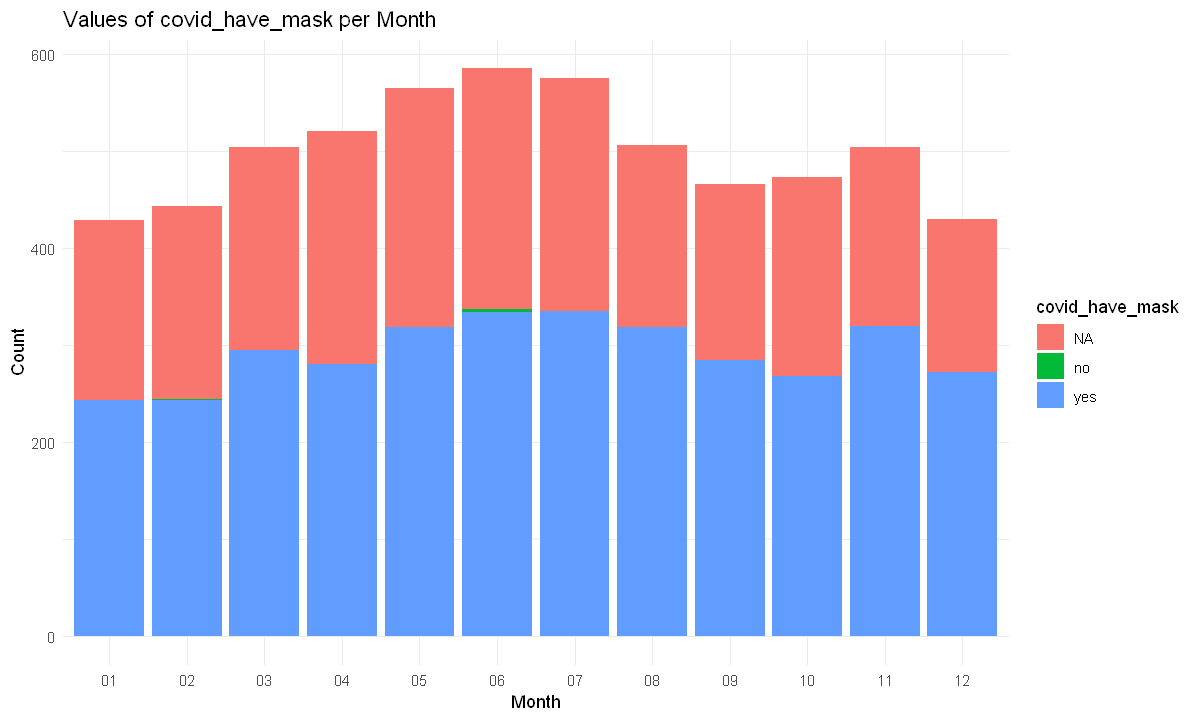

In [619]:
#change column value to character
Assessments_df$covid_have_gloves <- as.character(Assessments_df$covid_have_gloves)

# Count the unique values of "covid_have_mask" per month
summary_table <- Assessments_df %>%
  group_by(month, covid_have_mask) %>%
  summarise(count = n()) %>%
  ungroup()

# Create the stacked bar chart
p <- ggplot(summary_table, aes(x = month, y = count, fill = covid_have_mask)) +
  geom_col(position = "stack") +
  labs(title = "Values of covid_have_mask per Month", x = "Month", y = "Count", fill = "covid_have_mask") +
  theme_minimal()

# Display the chart
print(p)


**Covid Screening**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


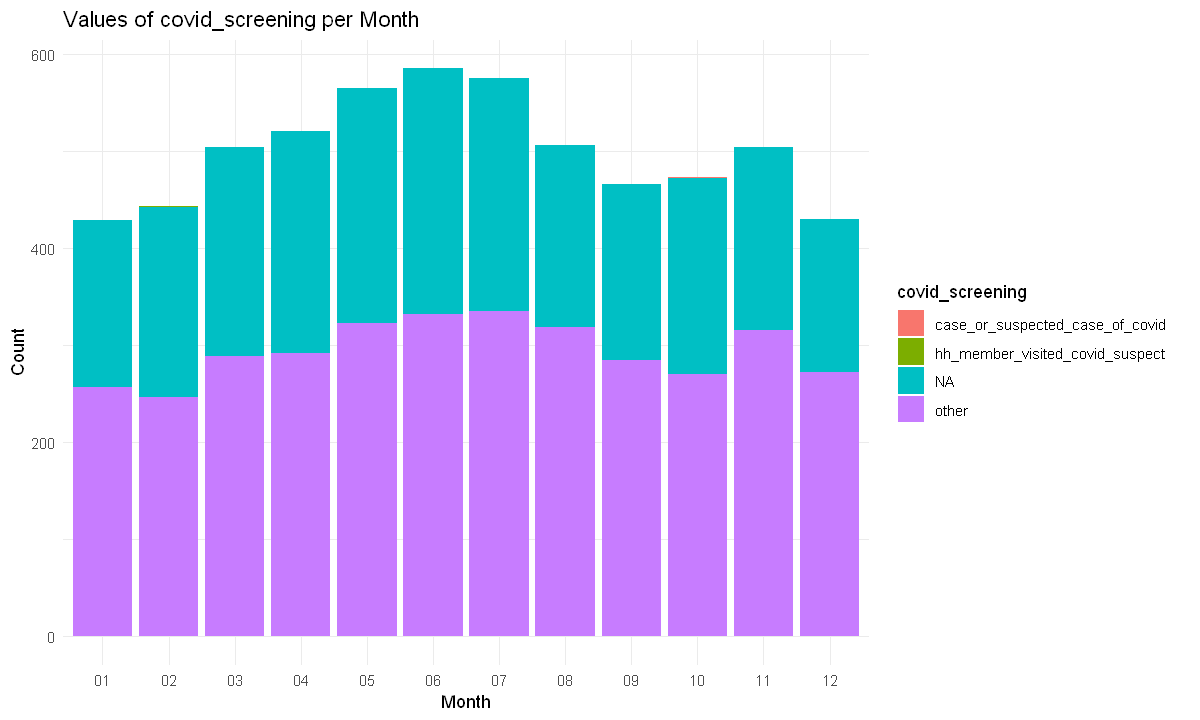

In [618]:
#change column value to character
Assessments_df$covid_have_gloves <- as.character(Assessments_df$covid_have_gloves)

# Count the unique values of "covid_screening" per month
summary_table <- Assessments_df %>%
  group_by(month, covid_screening) %>%
  summarise(count = n()) %>%
  ungroup()

# Create the stacked bar chart
p <- ggplot(summary_table, aes(x = month, y = count, fill = covid_screening)) +
  geom_col(position = "stack") +
  labs(title = "Values of covid_screening per Month", x = "Month", y = "Count", fill = "covid_screening") +
  theme_minimal()

# Display the chart
print(p)


**Wash Hands**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


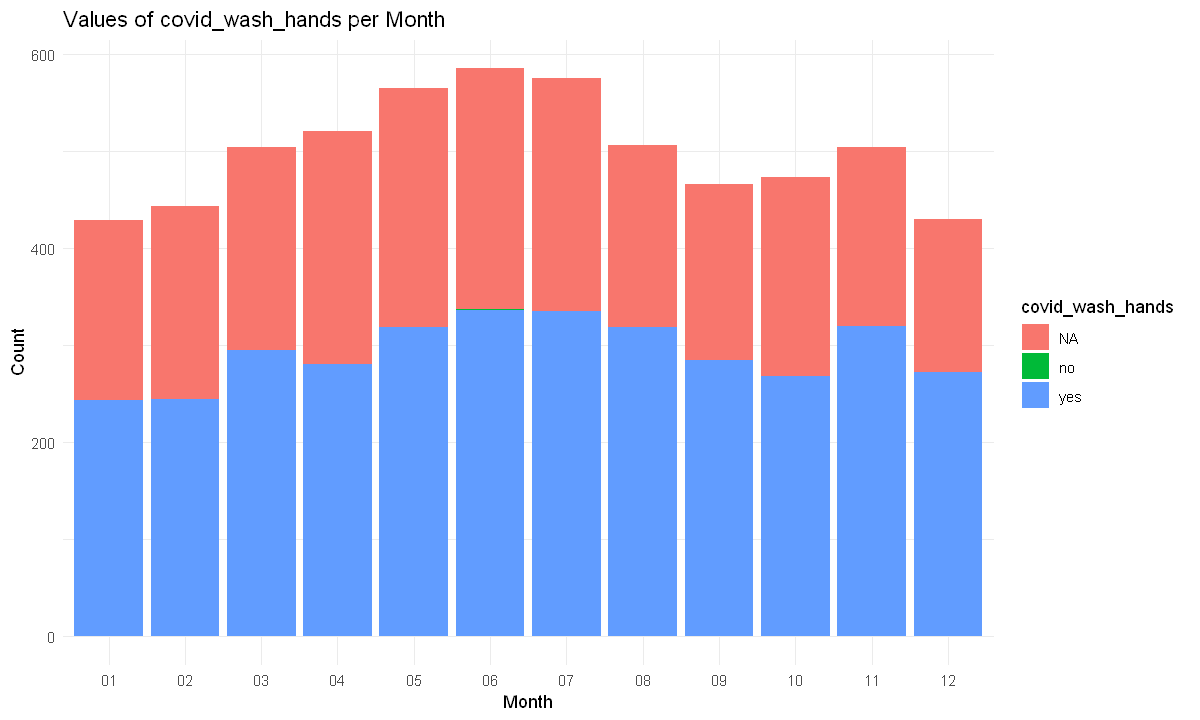

In [617]:
#change column value to character
Assessments_df$covid_wash_hands <- as.character(Assessments_df$covid_wash_hands)

# Count the unique values of "covid_wash_hands" per month
summary_table <- Assessments_df %>%
  group_by(month, covid_wash_hands) %>%
  summarise(count = n()) %>%
  ungroup()

# Create the stacked bar chart
p <- ggplot(summary_table, aes(x = month, y = count, fill = covid_wash_hands)) +
  geom_col(position = "stack") +
  labs(title = "Values of covid_wash_hands per Month", x = "Month", y = "Count", fill = "covid_wash_hands") +
  theme_minimal()

# Display the chart
print(p)


**Follow up Method**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


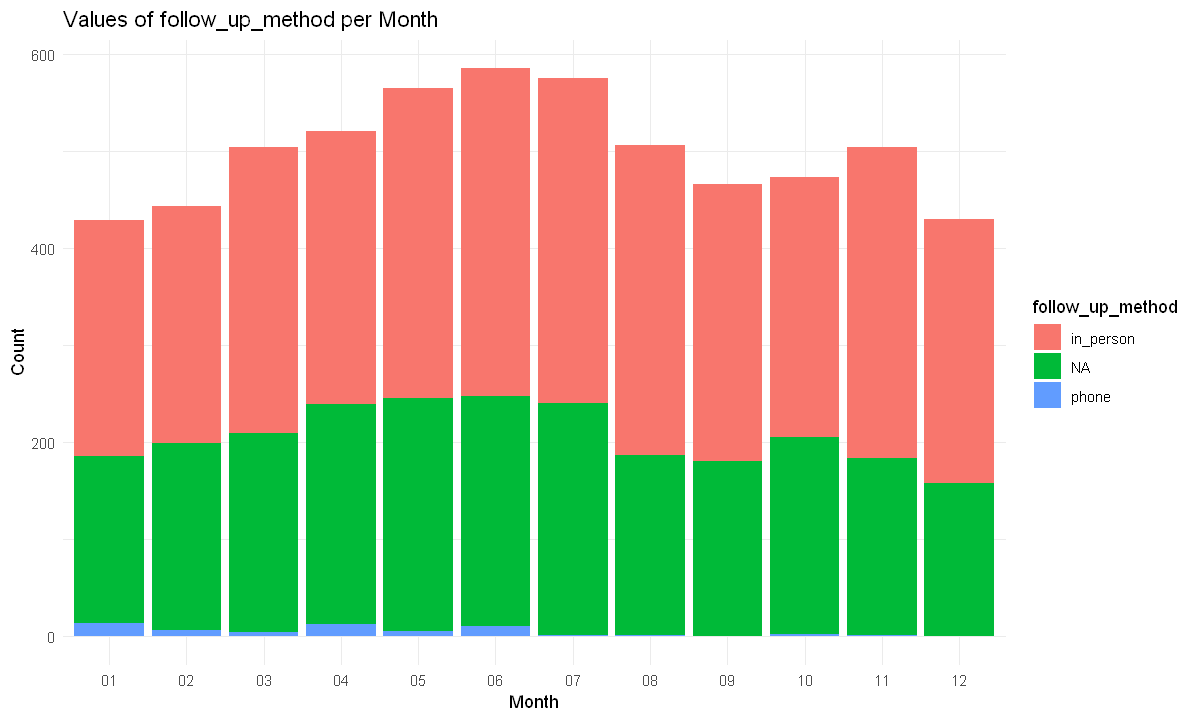

In [616]:
#change column value to character
Assessments_df$follow_up_method <- as.character(Assessments_df$follow_up_method)

# Count the unique values of "follow_up_method" per month
summary_table <- Assessments_df %>%
  group_by(month, follow_up_method) %>%
  summarise(count = n()) %>%
  ungroup()

# Create the stacked bar chart
p <- ggplot(summary_table, aes(x = month, y = count, fill = follow_up_method)) +
  geom_col(position = "stack") +
  labs(title = "Values of follow_up_method per Month", x = "Month", y = "Count", fill = "follow_up_method") +
  theme_minimal()

# Display the chart
print(p)


**Have Gloves**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


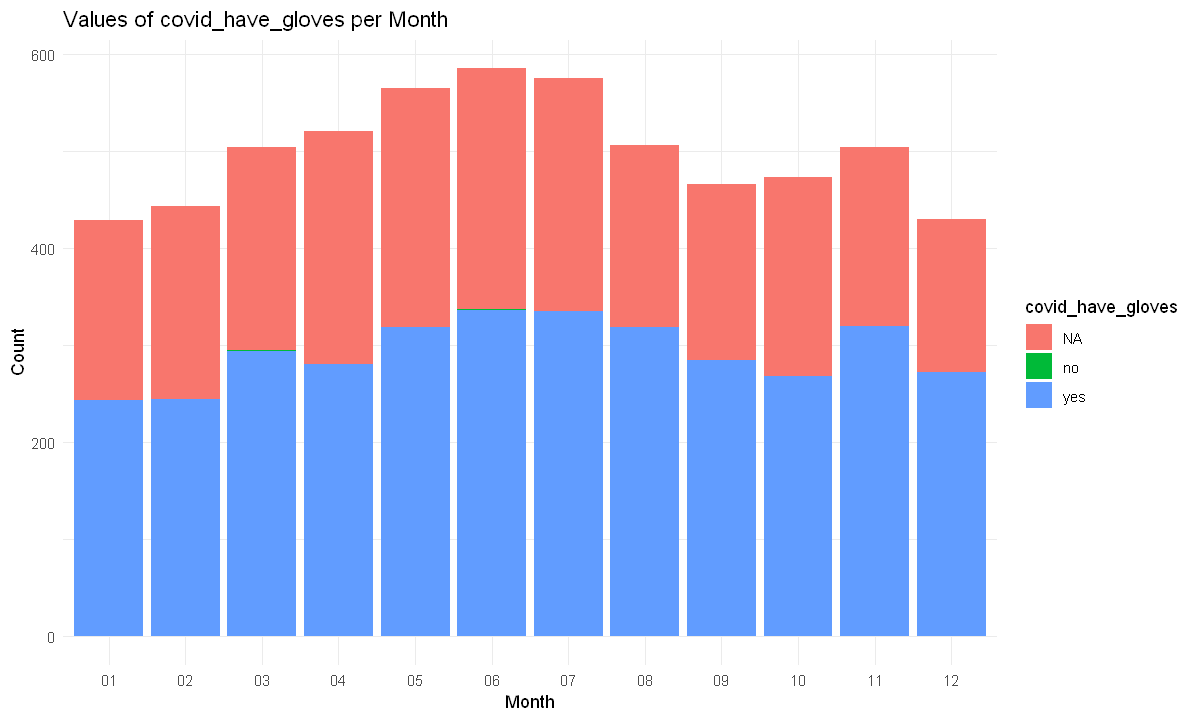

In [615]:
#change column value to character
Assessments_df$covid_have_gloves <- as.character(Assessments_df$covid_have_gloves)

# Count the unique values of "covid_have_gloves" per month
summary_table <- Assessments_df %>%
  group_by(month, covid_have_gloves) %>%
  summarise(count = n()) %>%
  ungroup()

# Create the stacked bar chart
p <- ggplot(summary_table, aes(x = month, y = count, fill = covid_have_gloves)) +
  geom_col(position = "stack") +
  labs(title = "Values of covid_have_gloves per Month", x = "Month", y = "Count", fill = "covid_have_gloves") +
  theme_minimal()

# Display the chart
print(p)


**Have Goggles**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


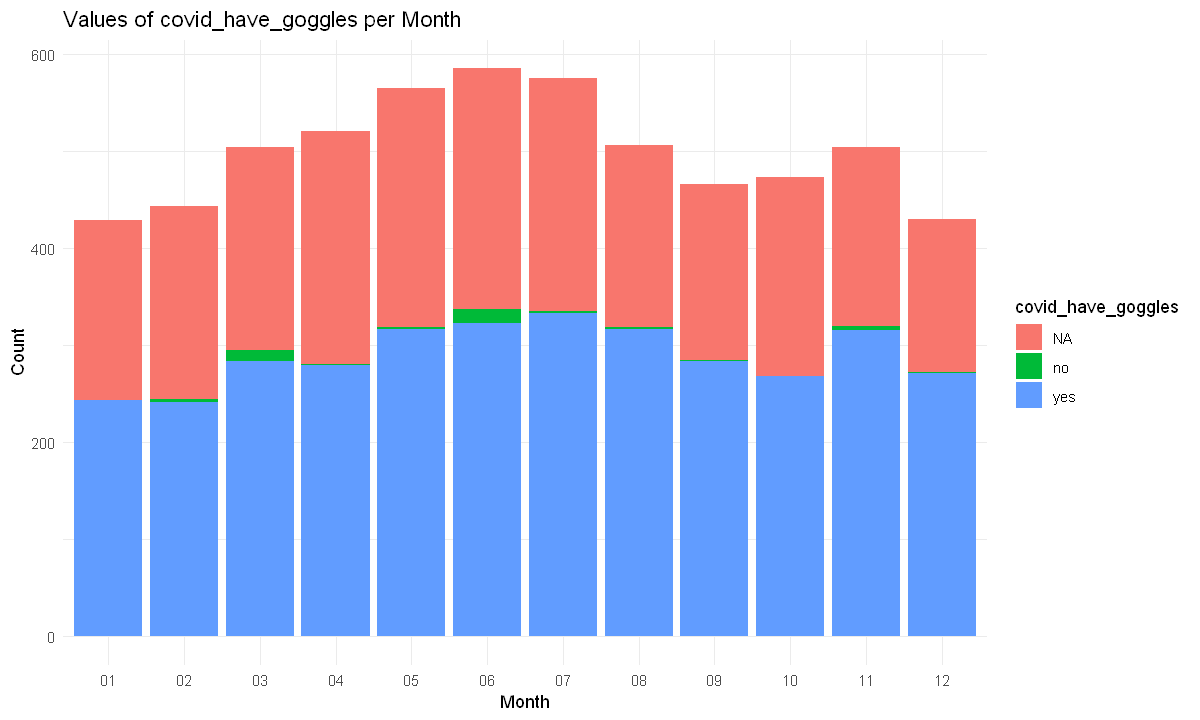

In [614]:
#change column value to character
Assessments_df$covid_have_goggles <- as.character(Assessments_df$covid_have_goggles)

# Count the unique values of "covid_have_goggles" per month
summary_table <- Assessments_df %>%
  group_by(month, covid_have_goggles) %>%
  summarise(count = n()) %>%
  ungroup()

# Create the stacked bar chart
p <- ggplot(summary_table, aes(x = month, y = count, fill = covid_have_goggles)) +
  geom_col(position = "stack") +
  labs(title = "Values of covid_have_goggles per Month", x = "Month", y = "Count", fill = "covid_have_goggles") +
  theme_minimal()

# Display the chart
print(p)


**Have an Apron**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


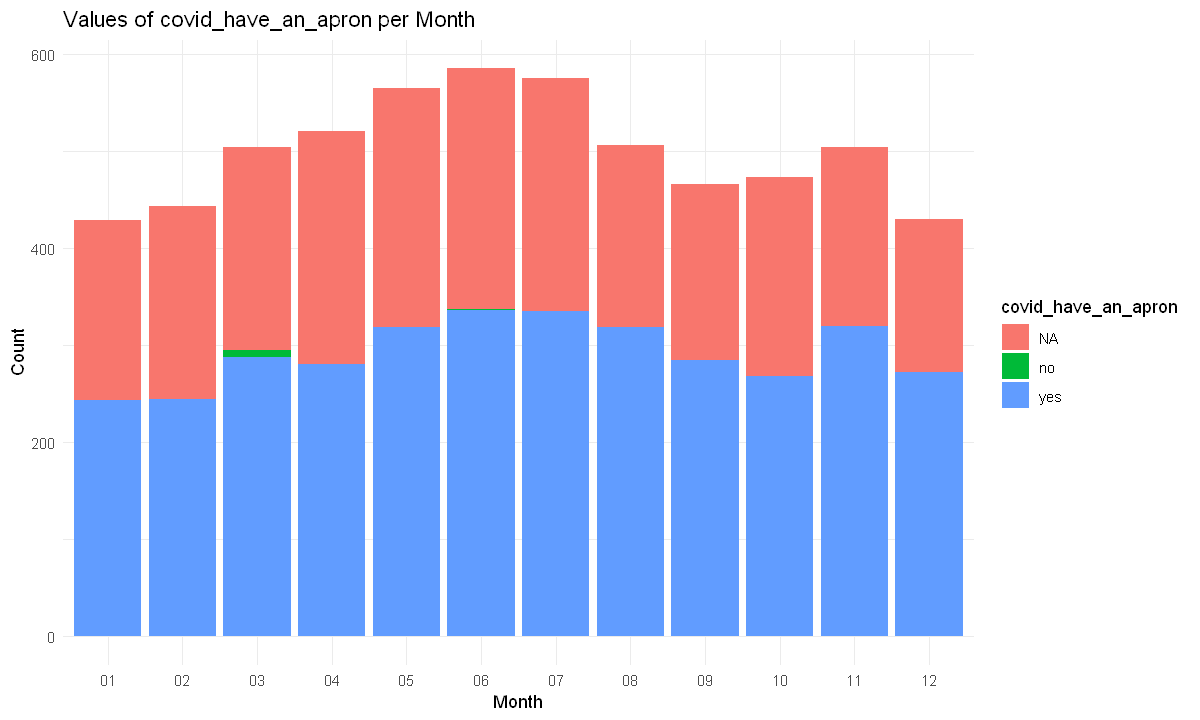

In [613]:
# Count the unique values of "covid_have_an_apron" per month
summary_table <- Assessments_df %>%
  group_by(month, covid_have_an_apron) %>%
  summarise(count = n()) %>%
  ungroup()

# Create the stacked bar chart
p <- ggplot(summary_table, aes(x = month, y = count, fill = covid_have_an_apron)) +
  geom_col(position = "stack") +
  labs(title = "Values of covid_have_an_apron per Month", x = "Month", y = "Count", fill = "covid_have_an_apron") +
  theme_minimal()

# Display the chart
print(p)



**Keep 2m Distance**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


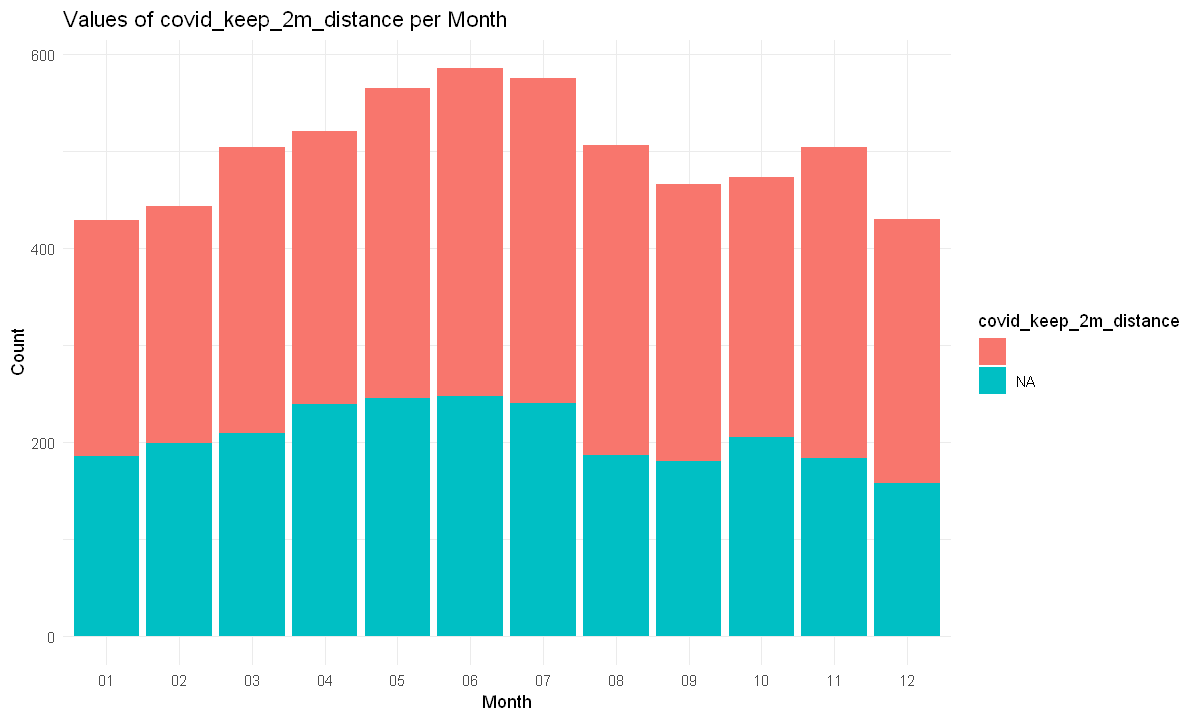

In [612]:
#change column value to character
Assessments_df$covid_keep_2m_distance <- as.character(Assessments_df$covid_keep_2m_distance)

# Count the unique values of "covid_keep_2m_distance" per month
summary_table <- Assessments_df %>%
  group_by(month, covid_keep_2m_distance) %>%
  summarise(count = n()) %>%
  ungroup()

# Create the stacked bar chart
p <- ggplot(summary_table, aes(x = month, y = count, fill = covid_keep_2m_distance)) +
  geom_col(position = "stack") +
  labs(title = "Values of covid_keep_2m_distance per Month", x = "Month", y = "Count", fill = "covid_keep_2m_distance") +
  theme_minimal()

# Display the chart
print(p)


**Have Kevon or Surgical Spirit**

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


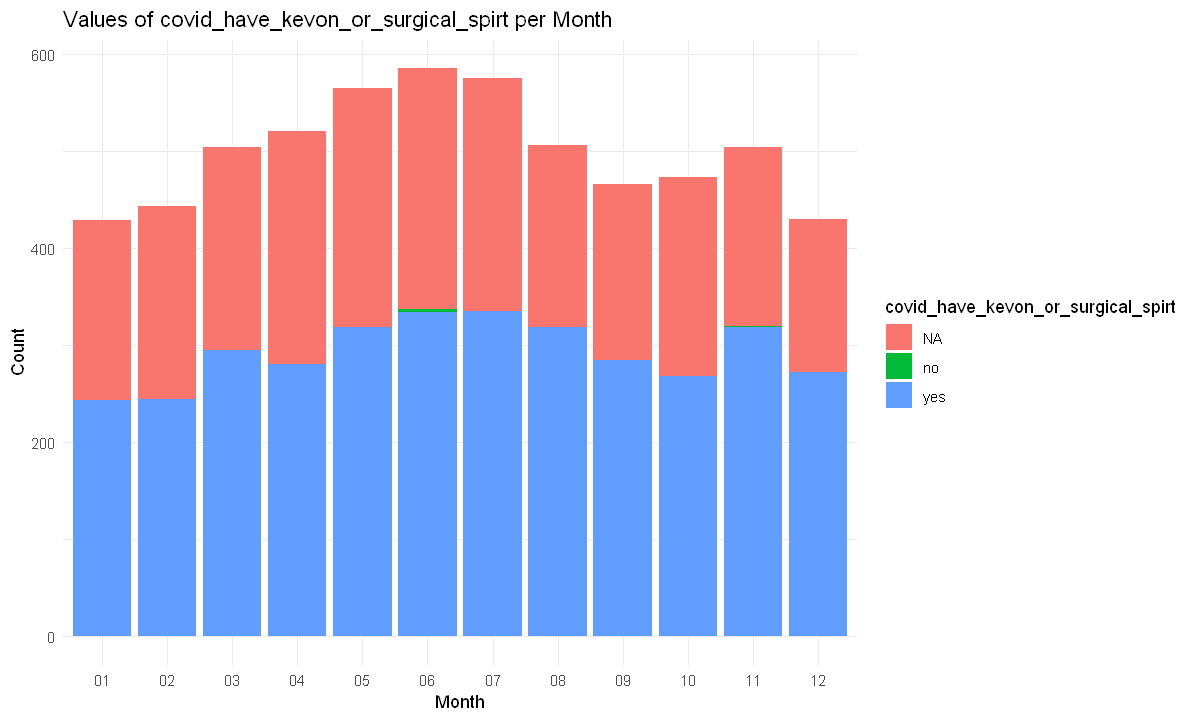

In [611]:
#change column value to character
Assessments_df$covid_have_kevon_or_surgical_spirt <- as.character(Assessments_df$covid_have_kevon_or_surgical_spirt)

# Count the unique values of "covid_have_kevon_or_surgical_spirt" per month
summary_table <- Assessments_df %>%
  group_by(month, covid_have_kevon_or_surgical_spirt) %>%
  summarise(count = n()) %>%
  ungroup()

# Create the stacked bar chart
p <- ggplot(summary_table, aes(x = month, y = count, fill = covid_have_kevon_or_surgical_spirt)) +
  geom_col(position = "stack") +
  labs(title = "Values of covid_have_kevon_or_surgical_spirt per Month", x = "Month", y = "Count", fill = "covid_have_kevon_or_surgical_spirt") +
  theme_minimal()

# Display the chart
print(p)


## Data Quality

To ensure data quality in reporting, analysts can employ various measures and techniques. Here are some key data quality measures that analysts can consider:

**1. Data Completeness:** 

Check for missing values or incomplete records. Ensure that all required data fields have been populated.


**2. Data Accuracy:** 

Verify the accuracy of data by cross-referencing with reliable sources or conducting data validation checks. Identify and rectify any discrepancies or errors.


**3. Data Consistency:** 

Check for consistency within the dataset, such as consistent formatting, units of measurement, or coding schemes. Address any inconsistencies to ensure reliable analysis and reporting.


**4. Data Validity:** 

Validate the data against predefined rules or constraints. Ensure that the data values fall within acceptable ranges and adhere to defined data types or formats.


**5. Data Integrity:** 

Ensure the integrity of the data by verifying relationships between related datasets or fields. Identify and resolve any referential integrity issues or data linkage problems.


**6. Data Uniqueness:** 

Check for duplicate records or entries within the dataset. Remove or handle duplicates to maintain data integrity and accuracy.


**7. Data Timeliness:** 

Assess the timeliness of the data to ensure it is up-to-date and relevant for reporting purposes. Consider the data collection frequency and update schedules.


**8. Data Security and Privacy:** 

Protect sensitive or confidential data by implementing appropriate security measures. Ensure compliance with data protection regulations and guidelines.


**9. Documentation and Metadata:** 

Maintain proper documentation and metadata to provide context and understanding of the data. Document data sources, transformations, assumptions, and any data-specific considerations.


**10. Data Governance:**

Establish data governance practices and policies to ensure accountability, ownership, and quality standards across the organization. Define roles, responsibilities, and processes for data management and quality control.


**It's important for analysts to have a systematic approach to data quality, including data profiling, data cleaning, and ongoing monitoring of data quality metrics. Implementing data quality checks as part of the data analysis and reporting workflows can help ensure reliable and trustworthy insights for decision-making.**

### Data Quality Checks in R

In R, you can perform various data quality checks on your dataframe using different functions and techniques. Here are some common data quality checks you can perform in R:

**1. Checking missing values:**

        + Identify missing values: is.na() or complete.cases()
    
        + Count missing values: sum(is.na()) or colSums(is.na())
    
        + Visualize missing values: vis_miss() from the visdat package or ggplot2 functions
    
    
**2. Checking duplicates:**

        + Identify duplicate rows: duplicated()

        + Count duplicate rows: sum(duplicated())
    

**3. Checking data types:**

        + View column data types: str() or typeof()

        + Convert data types: as.numeric(), as.character(), etc.

**4. Checking unique values:**

        + Count unique values in a column: length(unique()) or n_distinct()
    
        + View unique values in a column: unique()
    
**5. Checking outliers:**

        + Visualize outliers: boxplots, histograms, or scatter plots
    
        + Identify outliers using statistical techniques: z-scores, Tukey's fences, etc.
    
**6. Checking data consistency:**

        + Check for inconsistent or unexpected values in columns
    
        + Validate values against predefined rules or reference data

**7. Checking data integrity:**

        + Perform referential integrity checks between related columns or tables
    
        + Validate foreign key relationships
    
**8. Checking data distribution:**

        + Visualize data distribution: histograms, density plots, or QQ plots
    
        + Perform statistical tests for normality or other distributions
    
    
**These are just a few examples of data quality checks you can perform in R. The specific checks you need to perform may depend on the nature of your data and the requirements of your analysis or project**


### Automated Data Quality Checks in R

There are several R packages that provide automated data quality checks and generate comprehensive reports. One popular package is "DataExplorer," which offers functions for data profiling, missing value analysis, outlier detection, and more. It provides a detailed summary report with visualizations and statistics.


It will analyze the data and generate a report with various sections, including summary statistics, missing value analysis, categorical variable analysis, numerical variable analysis, and more. The report will include visualizations and insights to help you understand and assess the quality of your data.


An Analyst will need to customize the data quality checks or reports based on their specific requirements or data characteristics. The "DataExplorer" package provides flexibility to customize the analysis and reporting as needed.


Other packages that offer similar functionalities include "janitor," "summarytools," and "DataQualityR." You can explore these packages and choose the one that best fits your needs and preferences.


## Advise on some of the analytics that analysts should conduct 

To tell a compelling story of performance to different users of the data, analysts can conduct various analytics techniques to uncover insights and communicate findings effectively. Here are some analytics approaches that can help in storytelling:

**1. Descriptive Analytics:** 

Provide a summary of historical performance using descriptive statistics, charts, and visualizations. This helps users understand the current state and trends in the data.


**2. Comparative Analysis:** 

Compare performance metrics across different time periods, regions, products, or customer segments. Identify variations, patterns, or outliers to highlight key areas of improvement or success.


**3. Segmentation Analysis:** 

Segment the data based on relevant criteria (e.g., demographics, behavior, or characteristics). Analyze the performance of different segments individually to uncover insights about their unique behaviors and preferences.


**4. Trend Analysis:** 

Analyze data over time to identify trends, seasonality, or patterns. Show how performance has evolved and highlight potential future directions.


**5. Root Cause Analysis:** 

Investigate factors influencing performance by identifying the root causes of specific outcomes. Conduct exploratory analysis, correlation analysis, or regression analysis to identify key drivers and their impact.


**6. Predictive Analytics:** 

Use predictive modeling techniques to forecast future performance based on historical data. Provide insights into potential outcomes and scenarios to aid decision-making.


**7. Cohort Analysis:** 

Analyze groups of users/customers who share a common characteristic or experience during a specific time period. Compare their performance and behavior to identify insights about their journey and inform targeted strategies.


**8. Text and Sentiment Analysis:** 

Analyze unstructured data such as customer feedback, reviews, or social media sentiment. Extract key themes, sentiment trends, or common pain points to understand customer perceptions and inform improvement efforts.


**9. Storytelling with Data Visualization:** 

Create engaging and impactful visualizations to present data in a narrative format. Use charts, infographics, or interactive dashboards to convey insights and guide users through the story.


**10. Business Impact Analysis:** 

Assess the impact of specific initiatives, campaigns, or interventions on performance metrics. Quantify the contribution and ROI of key activities to demonstrate value and inform future decision-making.


**By applying these analytics approaches, analysts can not only present data but also provide meaningful interpretations, actionable insights, and compelling narratives that resonate with different users of the data.**
